In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import wget
import numpy as np
import cv2
from cntk import load_model, combine

In [2]:
# Open downloaded labels
#!wget "http://data.mxnet.io/models/imagenet-11k/synset.txt"
with open('synset.txt', 'r') as f:
    LABELS = [l.rstrip() for l in f]

#!wget "https://www.cntk.ai/Models/ResNet/ResNet_18.model"
MODEL_PATH = "ResNet_18.model"

In [3]:
# Sample
URL = 'https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAMiAAAAJGVlYTU5Y2YyLWQwMzYtNDlmZS04MDdlLWI0ZjJjZWRhYjk4ZQ.jpg'

In [4]:
# Load CNTK Model
z = load_model(MODEL_PATH)

In [5]:
# Get last layer -> 3
# https://github.com/Microsoft/CNTK/wiki/Evaluate-a-saved-convolutional-network
for index in range(len(z.outputs)):
    print("Index {} for output: {}.".format(index, z.outputs[index].name))

Index 0 for output: ce.
Index 1 for output: errs.
Index 2 for output: top5Errs.
Index 3 for output: z.


In [14]:
def get_image(url):
    filename = wget.download(url)
    img = cv2.imread(filename)
    if img is None:
        print('failed to download ' + url)
    return filename

In [27]:
def predict(filename, synsets):
    
    # Load image and resize
    img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    
    # Show image
    plt.imshow(img)
    plt.axis('off')

    img = np.array(img, dtype=np.float32)
    img = np.ascontiguousarray(np.transpose(img, (2, 0, 1)))
    
    # Use last layer to make prediction
    z_out = combine([z.outputs[3].owner])
    result = np.squeeze(z_out.eval({z_out.arguments[0]:[img]}))

    # Sort probabilities
    a = np.argsort(result)[::-1] 
    
    for i in a[0:5]:
        print('probability=%f, class=%s, %i' % (result[i], LABELS[i], i))

probability=10.865135, class=n01794651 ocellated turkey, Agriocharis ocellata, 845
probability=10.522146, class=n01533481 common canary, Serinus canaria, 311
probability=9.637687, class=n01819465 pink cockatoo, Kakatoe leadbeateri, 904
probability=9.608020, class=n01534155 bullfinch, Pyrrhula pyrrhula, 314
probability=9.184223, class=n01533651 serin, 312


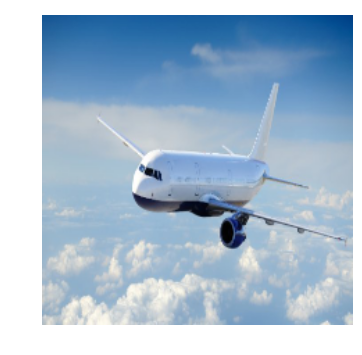

In [28]:
predict(get_image(URL), LABELS)  # Plane?